In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# train data
train = pd.read_csv('train_ctrUa4K.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# test data
test = pd.read_csv('test_lAUu6dG.csv')

In [5]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [6]:
## making copy of dataset to retain original dataset
train_original = train.copy()
test_original = test.copy()

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [9]:
#checking null
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
train.shape , test.shape

((614, 13), (367, 12))

 **Univariate analysis** is analysis of data variable individually.
> for categorial features we can use **bar plot** or frequency table.\
> for numerical features we can use **probability density plot**.


In [11]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [13]:
## Loan of 422(69%) people approved out of 614 applicants

<AxesSubplot:>

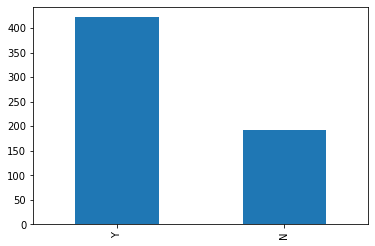

In [14]:
train['Loan_Status'].value_counts().plot.bar()

### Independent Variable (Categorical)

> A categorical variable (sometimes called a nominal variable) is one that has two or more categories, but there is no intrinsic ordering to the categories. For example, a binary variable (such as yes/no question) is a categorical variable having two categories (yes or no) and there is no intrinsic ordering to the categories.  Hair color is also a categorical variable having a number of categories (blonde, brown, brunette, red, etc.) and again, there is no agreed way to order these from highest to lowest.


<AxesSubplot:title={'center':'Credit_History'}>

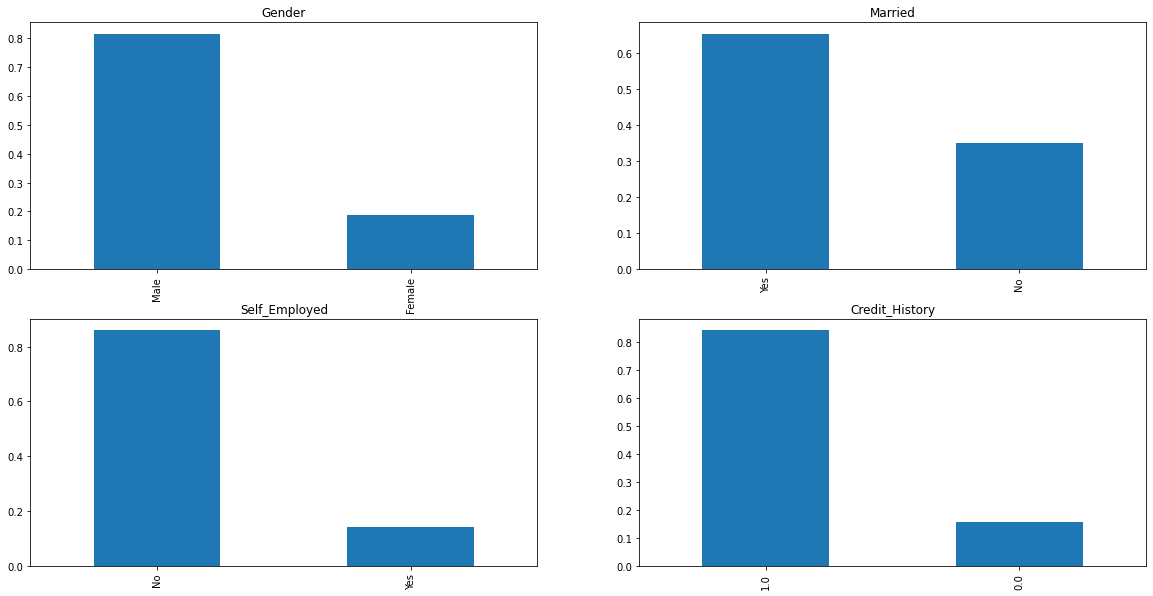

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')



### Inference from above Bar plots

1. 80% of aaplicants for loan are male
2. approx 65% applicants are married
3. 85% applicants are not self employed.
4. 85% have good credit history.

###  Independent variable (Ordinal)
> An ordinal variable is similar to a categorical variable.  The difference between the two is that there is a clear ordering of the categories. For example, suppose you have a variable, economic status, with three categories (low, medium and high).  variable like educational experience (with values such as elementary school graduate, high school graduate, some college and college graduate). These also can be ordered as elementary school, high school, some college, and college graduate

<AxesSubplot:title={'center':'Property_Area'}>

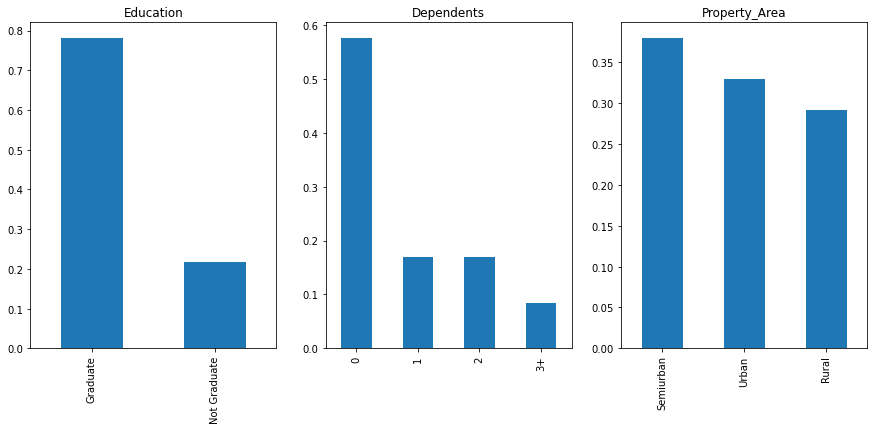

In [16]:

plt.subplot(131)
train['Education'].value_counts(normalize=True).plot.bar(title='Education' , figsize=(15,6))

plt.subplot(132)
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents' , figsize=(15,6))

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area' , figsize=(15,6))

## Inference
1. approx 75% are graduates
2. more than 50% dependents does not have any dependnts
3. more than 35% from semiurban area

Q . **Why does it matter whether a variable is categorical, ordinal?**\
A. An average of a nominal variable does not make much sense because there is no intrinsic ordering of the levels of the categories. Moreover, if you tried to compute the average of educational experience as defined in the ordinal section above, you would also obtain a nonsensical result. 

In [17]:
## independent variables (Numerical)

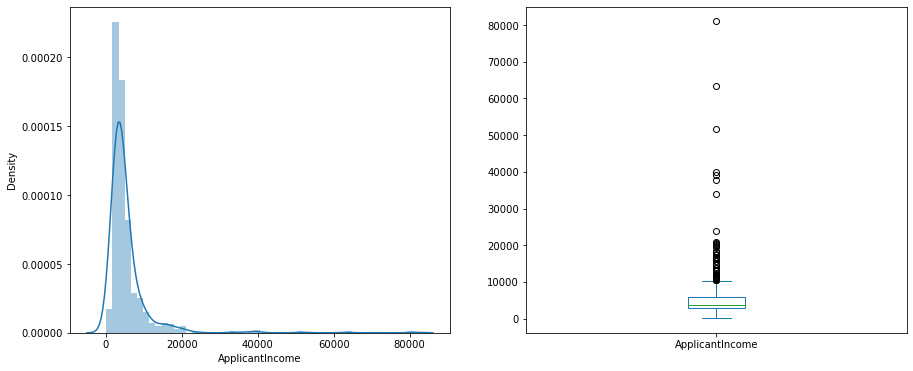

In [18]:
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(15,6))
plt.show()

In [19]:
# applicant income is towards left means it is not normally distributed./
# box plot confirms the ouliers presence.this sttrubutes toward income disparity in society./


Text(0.5, 0.98, ' ')

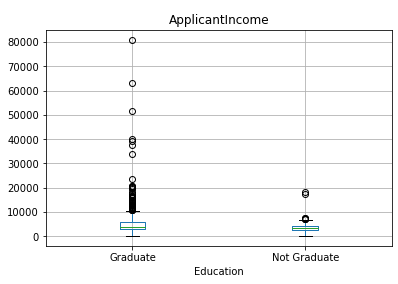

In [20]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle(" ")


In [21]:
## we can see that graduates have very high income

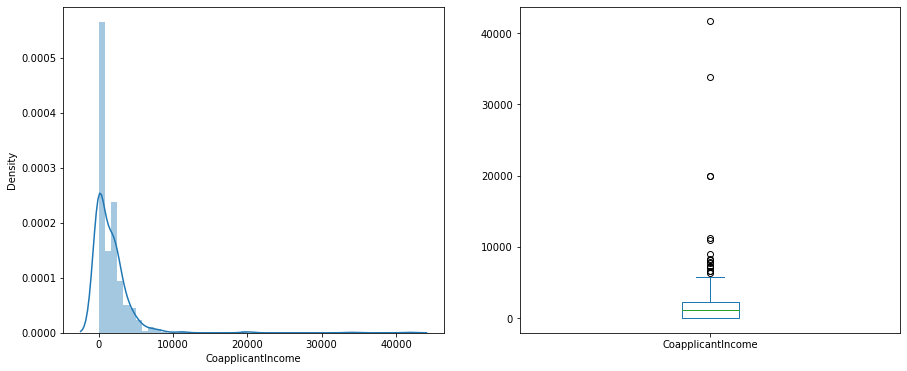

In [22]:
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(15,6))
plt.show()

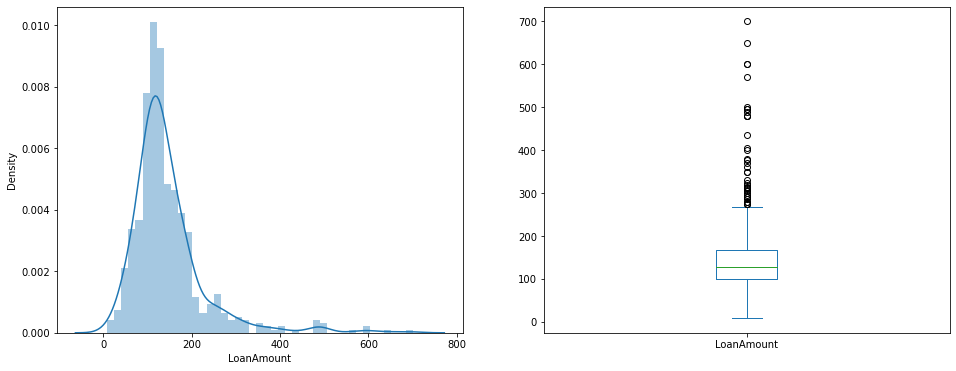

In [23]:
plt.subplot(121)
sns.distplot(train['LoanAmount'])

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,6))
plt.show()

In [24]:
## distribution seems faily normal but it consists lots of outliers.


## Bivariate Anlysis

In [25]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'],normalize='index')


In [26]:
Gender

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


<AxesSubplot:xlabel='Gender'>

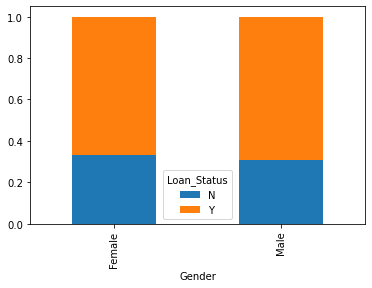

In [27]:
Gender.plot(kind='bar',stacked=True )

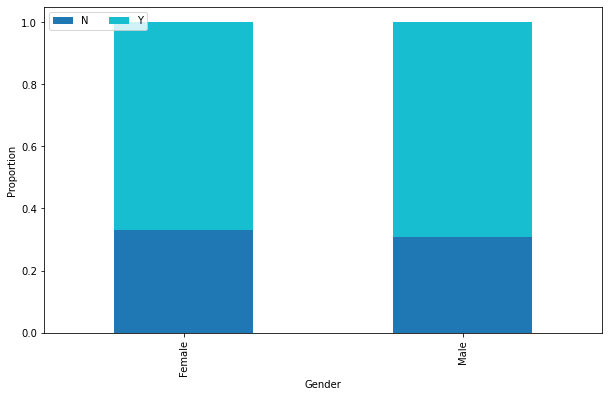

In [28]:
Gender.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10, 6))
plt.legend(loc="upper left", ncol=2)
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.show()

<AxesSubplot:xlabel='Self_Employed'>

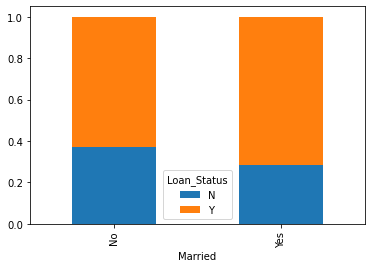

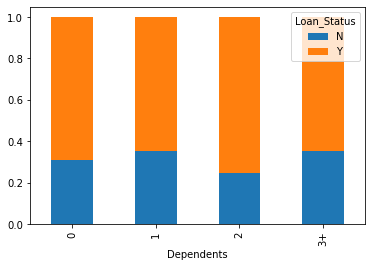

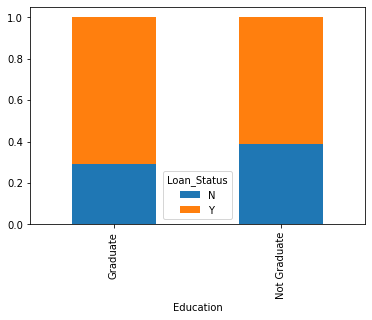

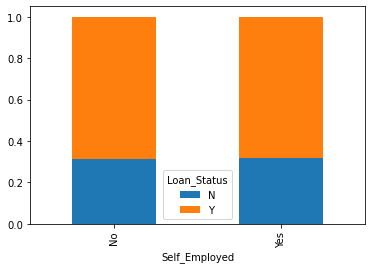

In [29]:
Married = pd.crosstab(train['Married'],train['Loan_Status'],normalize='index')
Married.plot(kind='bar',stacked=True )

Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'],normalize='index')
Dependents.plot(kind='bar',stacked=True )

Education= pd.crosstab(train['Education'],train['Loan_Status'],normalize='index')
Education.plot(kind='bar',stacked=True )

Self_Employed= pd.crosstab(train['Self_Employed'],train['Loan_Status'],normalize='index')
Self_Employed.plot(kind='bar',stacked=True )



<AxesSubplot:xlabel='Property_Area'>

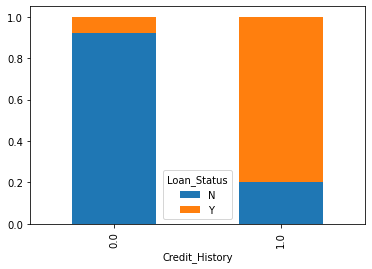

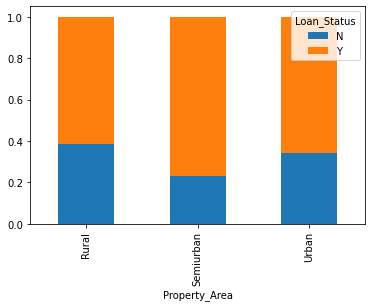

In [30]:
Credit_History= pd.crosstab(train['Credit_History'],train['Loan_Status'],normalize='index')
Credit_History.plot(kind='bar',stacked=True )

Property_Area= pd.crosstab(train['Property_Area'],train['Loan_Status'],normalize='index')
Property_Area.plot(kind='bar',stacked=True )

In [31]:
## people with credit history 1 are more likely to get loan approved
## proportion of loan getting approved in semiurban area is higher as compared to other area.

<AxesSubplot:xlabel='Loan_Status'>

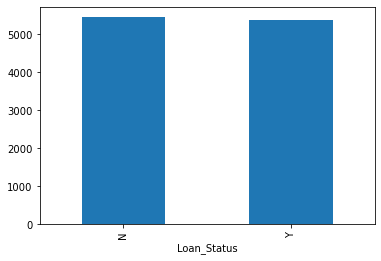

In [32]:
## mean income of people for which loan has been approved
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [33]:
## replace 3+ with 3 and 'N'with 0 and Y with 1
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

In [34]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


<AxesSubplot:>

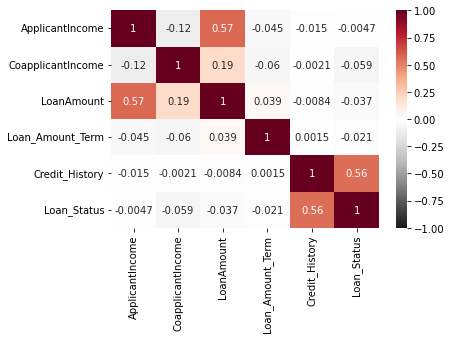

In [35]:
# we will use heat map to visualize correlation.
matrix = train.corr()
sns.heatmap(matrix,cmap='RdGy_r',vmax=1,vmin=-1 , annot=True)

In [36]:
# most correlated variables are (Applicant_income-loanAmount),( credit_history - Loan_amount)

### Outliers and missing value treatement

### missing value imputation
>**for numerical variables:** imputation using mean or median.\
> **for categorical variable:** imputation using mode


In [37]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [38]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
##.mode() returns two values and hence to use the mode value, we use [0] in that case.

In [39]:
# we saw that LoanAmount have outliers, mean will not be great approach\
# as it is affected by ouliers so we use Median to fill null vallues
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [40]:
train.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## imputation for test data
> As a general guideline, we use the statistics of the train set to fill the missing values in test set. 
Since, test set is unseen data, we do not use it for any imputations.


In [41]:
test['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)


In [42]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Outliers Treatment
> one way to remove skewness is by doing log transformation.\
>log does not affect smaller values much but it reduces the larger values

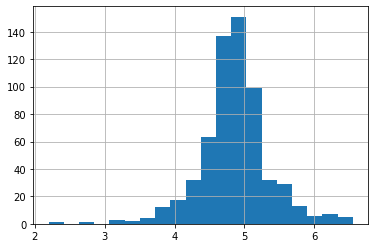

In [43]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']= np.log(test['LoanAmount'])

In [44]:
# drop loan id as it does not affects loan status

train = train.drop(columns=['Loan_ID'])


In [45]:
test = test.drop('Loan_ID',axis=1)

# gettting dummy variables


In [46]:
X = train.drop('Loan_Status' , axis=1)
y = train.Loan_Status

In [47]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test = pd.get_dummies(test)


In [48]:
 #we divide our train dataset into two parts: train and valdation
# we train model on train  part uising that make prediction for validation part

In [49]:
from sklearn.model_selection import train_test_split 

In [50]:
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=.3)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [52]:
log_regr = LogisticRegression()

In [53]:
log_regr.fit(x_train,y_train)

LogisticRegression()

In [54]:
# Loan status for validdation set (y- predict)
pred_cv = log_regr.predict(x_cv)

In [55]:
# accuracy of our prediction
accuracy_score(y_cv,pred_cv)

0.8054054054054054

In [56]:
# our prediction is almost 78% accurate

In [57]:
## prediction for test dataset

In [58]:
pred_test = log_regr.predict(test)

In [59]:
#import submission file which we have to submit on solution checker
submission = pd.read_csv('sample_submission_49d68Cx.csv')


In [60]:
submission['Loan_Status']= pred_test
submission['Loan_ID']= test_original['Loan_ID']

In [61]:
# we need prediction in Y and N so lets convert 1 & 0 

submission['Loan_Status'].replace(0,'N', inplace=True)
submission['Loan_Status'].replace(1,'Y', inplace=True)

In [62]:
# finally we convert submission to .csv
pd.DataFrame(submission , columns=['Loan_ID','Loan_Status']).to_csv('LoanPredlogistic.csv')

In [63]:
## logistic regression using liblinear as solver

logr_liblinear= LogisticRegression(verbose=1, solver='liblinear')

In [64]:
logr_liblinear.fit(x_train,y_train)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [65]:
pred_cv_liblinear = logr_liblinear.predict(x_cv) 

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
confusion_matrix(y_cv , pred_cv_liblinear)

array([[ 26,  30],
       [  1, 128]], dtype=int64)

In [68]:
accuracy_score(y_cv , pred_cv_liblinear)

0.8324324324324325

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [70]:
auc = roc_auc_score(y_cv, pred_cv_liblinear)
fpr , tpr , thresholds =roc_curve(y_cv, pred_cv_liblinear)

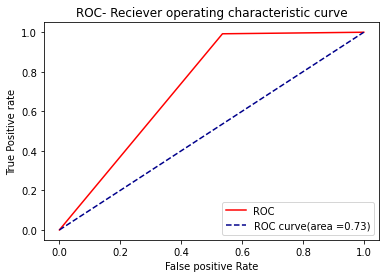

In [71]:
plt.plot(fpr ,tpr ,color ='red' , label = 'ROC')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label ='ROC curve(area =%0.2f)' % auc)
plt.xlabel('False positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC- Reciever operating characteristic curve')
plt.legend()
plt.show()

## stratified k fold cross validation

In [72]:
from sklearn.model_selection import StratifiedKFold

accuracy =[]

skf = StratifiedKFold(n_splits=5 , random_state=1 , shuffle=True )
skf.get_n_splits(X,y)

for train_index , test_index in skf.split(X,y):
    print('Train:', train_index , 'Validation:', test_index)
    xtr,xvl = X.iloc[train_index], X.iloc[test_index]
    ytr , yvl = y.iloc[train_index], y.iloc[test_index]
    
    logr_liblinear.fit(xtr ,ytr)
    prediction =logr_liblinear.predict(xvl)# y-pred
    score = accuracy_score( yvl , prediction)
    accuracy.append(score)
    
    
print(accuracy)
    
    
    
    


Train: [  0   1   2   4   6   8   9  10  11  13  14  15  16  17  18  19  20  21
  22  24  25  26  27  32  33  34  35  37  38  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  59  60  61  62  63  64  65
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  84  86  87
  88  90  91  92  93  94  95  97  99 100 102 103 105 106 107 108 111 113
 114 115 116 117 118 119 120 121 122 124 125 126 127 128 129 130 131 132
 134 135 136 137 138 139 140 141 142 143 145 146 147 148 149 150 151 152
 153 154 156 158 160 162 163 164 166 167 168 169 170 171 173 174 175 176
 178 179 180 181 182 184 185 186 187 188 190 191 192 193 195 196 197 199
 201 202 203 204 205 206 207 210 211 212 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 233 234 235 236 237 238 240 241
 243 245 246 248 249 250 251 252 253 256 257 258 259 260 262 263 264 265
 266 267 268 269 270 271 272 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 294 295 296 298

In [73]:
np.array(accuracy).mean()

0.8126749300279889

In [74]:
# mean validation accuracy for this model is 81%

# lets visualise ROC curve

In [75]:
AUC = roc_auc_score(yvl, prediction)
FPR , TPR , Thresholds =roc_curve(yvl, prediction)


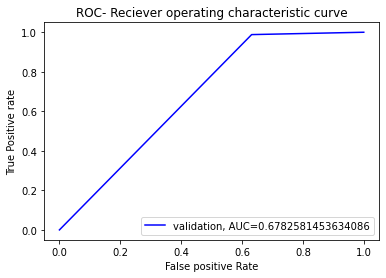

In [76]:
plt.plot(FPR ,TPR ,color ='blue' , label ='validation, AUC='+str(AUC))
#plt.plot([ color = 'darkblue', linestyle = '--')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC- Reciever operating characteristic curve')
plt.legend(loc=4)
plt.show()

In [77]:
## lets try to improve accuracy using different approaches

### Feature Enginnering
> Based on domain Knowledge we can come up with new features\
> total income - combine applicant income and coapplicant income.\
> EMI - we can calculate  EMI by taking ratio of loan amount with respect to loan amount term\

In [78]:
train['Total_income']= train['ApplicantIncome']+train['CoapplicantIncome']

test['Total_income']= test['ApplicantIncome']+test['CoapplicantIncome']

<AxesSubplot:xlabel='Total_income', ylabel='Density'>

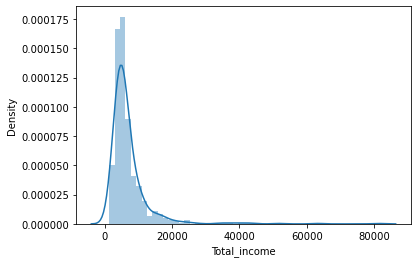

In [79]:
# distribution of total income
sns.distplot(train['Total_income'])

In [80]:
## we can see that it is shifted toward left ie. distribution is right skewed.
# take a log transformation to make the distribution normal.

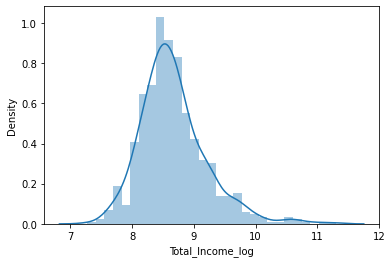

In [81]:
train['Total_Income_log']=np.log(train['Total_income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log']=np.log(test['Total_income'])

In [82]:
train['EMI']= train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

<AxesSubplot:xlabel='EMI', ylabel='Density'>

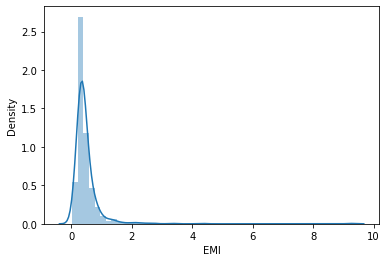

In [83]:
sns.distplot(train['EMI'])

<AxesSubplot:xlabel='Balance Income', ylabel='Density'>

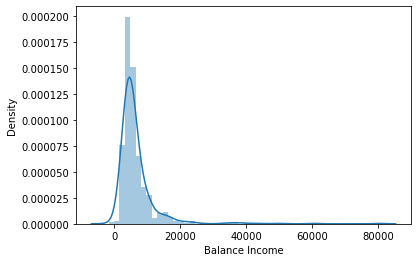

In [84]:
# create balance income feature and its ditribution
train['Balance Income']=train['Total_income']-(train['EMI']*1000)
test['Balance Income']= test['Total_income']-(test['EMI']*1000)

# multiply with 1000 to make unit equal

sns.distplot(train['Balance Income'])

In [85]:
# drop the variables which we used to create these new features.
# bcz correlation bt old features and new features will be very high.
# we also want to remove noise from the dataset

In [86]:
train = train.drop(['ApplicantIncome' , 'CoapplicantIncome' , 'LoanAmount','Loan_Amount_Term'],axis=1)

In [87]:
test = test.drop(['ApplicantIncome' , 'CoapplicantIncome' , 'LoanAmount','Loan_Amount_Term'],axis=1)

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
X = train.drop('Loan_Status',1)

In [90]:
y = train.Loan_Status  # target variable

## Logistic regression model

In [135]:
# Logistic Regression(Lr)
Lr = LogisticRegression(random_state=1 , solver='liblinear')

In [136]:

accuracy =[]

kf = StratifiedKFold(n_splits=5 , random_state=1 , shuffle=True )
kf.get_n_splits(X,y)

for train_index , test_index in kf.split(X,y):
    print('Train:', train_index , 'Validation:', test_index)
    Xtr,Xvl = X.iloc[train_index], X.iloc[test_index]
    ytr , yvl = y.iloc[train_index], y.iloc[test_index]
    
    Lr.fit(Xtr ,ytr)
    y_pred_test =Lr.predict(Xvl)# y-pred
    scores = accuracy_score( yvl , y_pred_test)
    accuracy.append(scores)
    
    
print(accuracy)

Train: [  0   1   2   4   6   8   9  10  11  13  14  15  16  17  18  19  20  21
  22  24  25  26  27  32  33  34  35  37  38  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  59  60  61  62  63  64  65
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  84  86  87
  88  90  91  92  93  94  95  97  99 100 102 103 105 106 107 108 111 113
 114 115 116 117 118 119 120 121 122 124 125 126 127 128 129 130 131 132
 134 135 136 137 138 139 140 141 142 143 145 146 147 148 149 150 151 152
 153 154 156 158 160 162 163 164 166 167 168 169 170 171 173 174 175 176
 178 179 180 181 182 184 185 186 187 188 190 191 192 193 195 196 197 199
 201 202 203 204 205 206 207 210 211 212 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 233 234 235 236 237 238 240 241
 243 245 246 248 249 250 251 252 253 256 257 258 259 260 262 263 264 265
 266 267 268 269 270 271 272 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 294 295 296 298

In [137]:
np.array(accuracy).mean()

0.7980407836865254

In [138]:
prediction_test = Lr.predict(test)

In [95]:
## replacing 0 and 1 with Y and N

In [96]:
submission['Loan_Status'] = pred_test # fill loan_statsus with prediction
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

#converting file to .csv format

pd.DataFrame(submission , columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv',index=False)


## Random Forest Classifier

''''
 Try to improve accuracy by tuning hyperparameter for model.\
 though hyperparameter tuning does not guarantee increased accuracy,but it surely improve stability of model '''

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [98]:
Rf = RandomForestClassifier()

In [99]:
param = {  
    'n_estimators' :[5,10,50,100],
    'criterion': ['gini','entropy'],
    'max_depth': range(10),    
}

In [100]:
grid_search = GridSearchCV(estimator=Rf , param_grid=param , cv=10)

In [101]:
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=.3, random_state=1)

In [102]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'n_estimators': [5, 10, 50, 100]})

In [103]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 100}

In [104]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=4)

In [105]:
Rf_new = RandomForestClassifier(criterion='entropy' , max_depth = 4 ,
                                min_samples_leaf=1,n_estimators=100,
                               
                               )

In [106]:
Rf_new.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4)

In [107]:
Rf_new.score(x_cv,y_cv)

0.772972972972973

In [108]:
predict_test = Rf_new.predict(x_cv)

In [109]:
score= accuracy_score(y_cv , predict_test)

In [110]:
score  # same as above

0.772972972972973

In [111]:
predict_test = Rf_new.predict(test)

In [112]:
submission['Loan_Status'] = predict_test # fill loan_status with prediction
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

#converting file to .csv format

pd.DataFrame(submission , columns=['Loan_ID','Loan_Status']).to_csv('RandomForest.csv',index=False)

<AxesSubplot:>

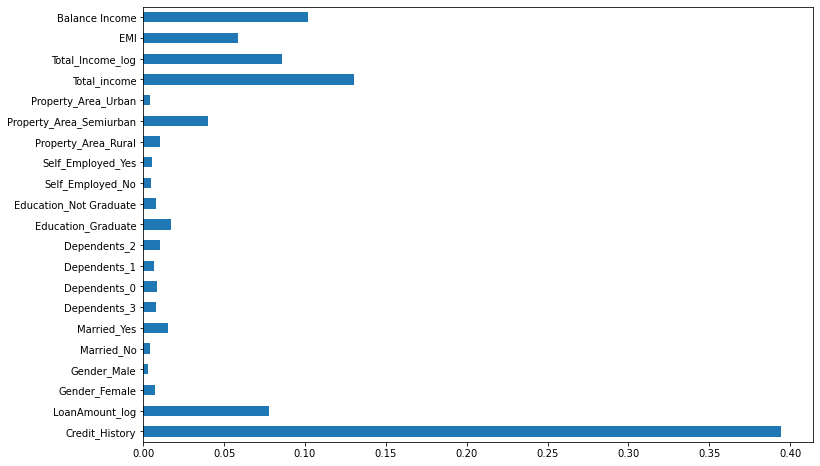

In [113]:
# finding which features are most important for this problem

importances = pd.Series(Rf_new.feature_importances_ , index=X.columns)
importances.plot(kind = 'barh', figsize=(12,8))

So, we can see that credit_history is most important features followed by Balance Income , Total income ,EMI

### XGBOOST CLASSIFIER

Xboost works only with numerical variable and we have already replaced the categorical variable with numerical variable.

In [114]:
from xgboost import XGBClassifier

In [115]:
# try grid search to optimise hyperparameter and improve accuracy.
# try ensemble technique(combination of different models)

In [116]:
xg_model = XGBClassifier()

In [117]:
xg_model.fit(x_train ,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [118]:
pred_y = xg_model.predict(x_cv)

In [119]:
score = accuracy_score(y_cv ,pred_y)

In [120]:
score

0.7567567567567568

In [121]:
pred_test = xg_model.predict(test)

In [122]:
## hyperparameter tuning for xgbooost

param = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [123]:
grid_cv = GridSearchCV(estimator=xg_model , param_grid=param , n_jobs=-1 , scoring='roc_auc')


In [124]:
grid_cv.fit(x_train ,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_...
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, pre

In [125]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 1,
 'learning_rate': 0.01,
 'max_depth': 3,
 'reg_lambda': 1,
 'scale_pos_weight': 5,
 'subsample': 0.8}

In [126]:
final_xg = XGBClassifier(**grid_cv.best_params_  )

In [127]:
final_xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [128]:
pred_test = final_xg.predict(x_cv)

In [129]:
score= accuracy_score(y_cv , pred_test)
score

0.7135135135135136

In [130]:
pred_test = final_xg.predict(test)

In [131]:
submission['Loan_Status'] = predict_test # fill loan_status with prediction
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

#converting file to .csv format

pd.DataFrame(submission , columns=['Loan_ID','Loan_Status']).to_csv('XGBoost_loanpred.csv',index=False)

 After trying different algorithms **Logistic regression (
 79%)** achieved best accuracy

## Pickling the model for deployement

In [140]:
import pickle

In [141]:
pickle.dump(Lr,open('logistic_M1.pkl','wb'))

In [142]:
model1 = pickle.load(open('logistic_M1.pkl','rb'))

In [143]:
model1.predict(test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,